## Part 1 [10 points] 
Write code in the cell below that reads in the <code>topnames.csv</code> file and creates a list of lists LoL represenation of the table. Then, use the representation to construct a pandas data frame object and display the the last sixty lines in the table. Do not consult Chapter 3 in your textbook when writing your code (you may consult the example code from class or Chapters 6-9 on Pandas). Note that for LoL Data Frame constructor, you will need to manually set the column labels of Data Frame in the constructor. (See example on white board in-class).

In [9]:
import pandas as pd 

_year = 0
_gender = 1
_name = 2
_count = 3

file = open("topnames.csv", 'r')
lol = []

babyColumns = file.readline().strip().split(',')  # list containing column fields

for line in file:
    curRow = line.strip().split(',')
    curList = []
    curList.append(str(curRow[_year]))
    curList.append(curRow[_gender])
    curList.append(curRow[_name])
    curList.append(int(curRow[_count]))
    lol.append(curList)
     
babyDF = pd.DataFrame(lol, columns = babyColumns)
babyDF.head()

,year,sex,name,count
0,1880,Female,Mary,7065
1,1880,Male,John,9655
2,1881,Female,Mary,6919
3,1881,Male,John,8769
4,1882,Female,Mary,8148


## Part 2 [10 Points]

Using Data Frame methods from pandas (along with built-in Python function(s)) calculate the average babies born per year in each decade for 80s, 90s, and 00s, i.e., you should display one average for each decase. You are not required to write your code in a function (it's fine to just execute your code in the cell). Your answers for each should be 119763.3, 79083.0, and 50586.7, respectively. 

In [10]:
babyYS = babyDF.set_index(["year", "sex"])   

babyDF80s = babyYS[("1980", "Female"):("1989", "Male")]
babyDF90s = babyYS[("1990", "Female"):("1999", "Male")]
babyDF00s = babyYS[("2000", "Female"):("2009", "Male")]

count80s = babyDF80s["count"]
count90s = babyDF90s["count"]
count00s = babyDF00s["count"]

average80s = sum(count80s)/10
average90s = sum(count90s)/10
average00s = sum(count00s)/10

print(average80s, average90s, average00s)

119763.3 79083.0 50586.7


## Part 3 [+ 3 EC if Correct]

* First, read Section 7.3.4 in your textbook to see the syntax for doing row selections using conditions (instead of *slicing* in the above examples). 

* Next, in the cell(s) below, write a function <code>maxDecadeBirths(babyDF)</code> that takes in a data frame <code>babyDF</code> whose rows only include data from one sex, and then returns string that indicates both which decade had the highest average and what the average is. Your function should use a loop to calcuate the maximum (i.e., it should easily scale to tables with data that might go back further in time). 

* Then, use this function to determine (along with what you learned in Section 7.3.4) to determine both the decades with the highest average female and male births. You do not need to consider the 2010s, since this decade is missing data for 2019. 

In [11]:
def maxDecadeBirths(genderBabyDF):
    ''' 
    Given a Data Frame containing either the female or male subtables,
    finds the decade with the highest average biths for the given gender.
    
    Parameters: Gender-specific Data Frame babyDF. 
    Return Value: maximum average births ma
    '''
    maxAvgBirths = 0
    maxDecade = 1880
    for decade in range(1880, 2010, 10):                    # loop over decades starting with 1880
        babyDFDecade = genderBabyDF[str(decade):str(decade+9)]    # delect table using slicing
        countCol = babyDFDecade["count"]                   
        average = sum(countCol)/10
        
        if average > maxAvgBirths:
            maxAvgBirths = average
            maxDecade = decade
            
    return maxAvgBirths, maxDecade

In [12]:
femaleDF = babyDF[babyDF['sex'] == 'Female'] # select rows using conditions instead of slice
femaleDF.set_index(["year"], inplace = True)
femaleAverage, femaleDecade = maxDecadeBirths(femaleDF)
print("The decade with the highest average female births were the %ds, which had %.1f female births per year." % (femaleDecade, femaleAverage))

# same code, but now for the male table instead 
maleDF = babyDF[babyDF['sex'] == 'Male']
maleDF.set_index(["year"], inplace = True)
maleAverage, maleDecade = maxDecadeBirths(maleDF)
print("The decade with the highset average male births were the %ds, which had %.1f male births per year." % (maleDecade, maleAverage))

The decade with the highest average female births were the 1940s, which had 71979.9 female births per year.
The decade with the highset average male births were the 1950s, which had 88278.7 male births per year.


In [14]:
babyYS = babyDF.set_index(["year", "sex"])    # set index to be year and sex

# selecting specific entries using loc and ioc
entry1 = babyYS.loc[("1991", "Female"), "count"]
print("The number of females born in the year 1991 was %d" % entry1)

# using iloc to select based on numerical indices
entry2 = babyYS.iloc[3, 1]
print("The number of males born in the year 1881 was %d" % entry2)

# This selects for the male count in 1881, since this is the row with index 3,
# and the column with index 1 (note that once year and sex are set to be indices, 
# they are no longer considered columns.)

babyYS.head(6)

The number of females born in the year 1991 was 43478
The number of males born in the year 1881 was 8769


name  count
year sex                
1880 Female  Mary   7065
     Male    John   9655
1881 Female  Mary   6919
     Male    John   8769
1882 Female  Mary   8148
     Male    John   9557

In [15]:
# iterating over the rows for a specific entry
for rowlabel, rowseries in babyYS.iterrows():
    print(str(rowlabel) + ":", rowseries["name"], rowseries["count"])

('1880', 'Female'): Mary 7065
('1880', 'Male'): John 9655
('1881', 'Female'): Mary 6919
('1881', 'Male'): John 8769
('1882', 'Female'): Mary 8148
('1882', 'Male'): John 9557
('1883', 'Female'): Mary 8012
('1883', 'Male'): John 8894
('1884', 'Female'): Mary 9217
('1884', 'Male'): John 9388
('1885', 'Female'): Mary 9128
('1885', 'Male'): John 8756
('1886', 'Female'): Mary 9889
('1886', 'Male'): John 9026
('1887', 'Female'): Mary 9888
('1887', 'Male'): John 8110
('1888', 'Female'): Mary 11754
('1888', 'Male'): John 9247
('1889', 'Female'): Mary 11648
('1889', 'Male'): John 8548
('1890', 'Female'): Mary 12078
('1890', 'Male'): John 8502
('1891', 'Female'): Mary 11703
('1891', 'Male'): John 7680
('1892', 'Female'): Mary 13172
('1892', 'Male'): John 9039
('1893', 'Female'): Mary 12784
('1893', 'Male'): John 8049
('1894', 'Female'): Mary 13151
('1894', 'Male'): John 8238
('1895', 'Female'): Mary 13446
('1895', 'Male'): John 8320
('1896', 'Female'): Mary 13811
('1896', 'Male'): John 8138
('189

In [16]:
# Note that Series objects are indexed in the same way we've been indexing data frames
nameSeries = babyYS['count']
nameSeries.head(20)

year  sex   
1880  Female     7065
      Male       9655
1881  Female     6919
      Male       8769
1882  Female     8148
      Male       9557
1883  Female     8012
      Male       8894
1884  Female     9217
      Male       9388
1885  Female     9128
      Male       8756
1886  Female     9889
      Male       9026
1887  Female     9888
      Male       8110
1888  Female    11754
      Male       9247
1889  Female    11648
      Male       8548
Name: count, dtype: int64

Using the tools shown, write code below that creates two lists <code>femalePercent</code> and <code>malePercent</code> that contain the percentage of births in each year for the given gender. For example, the first entry for both lists should correspond to births in the year 1880, and these entries should (roughly) be 42.2% (since 7065/(7065+9655) = 0.422) and 57.8%, respectively. 

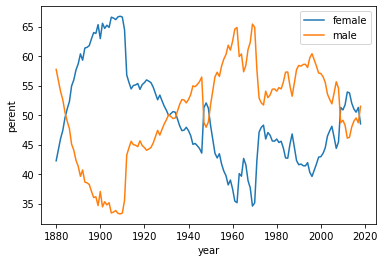

In [20]:
import matplotlib.pyplot as plt

femaleDF = babyDF[babyDF["sex"] == "Female"]
femaleDF.set_index(["year"], inplace=True)
femalePercent = []

maleDF = babyDF[babyDF["sex"] == "Male"]
maleDF.set_index(["year"], inplace=True)
malePercent = []

years = []

for year in range(1880, 2019):
    years.append(year)
    femaleCount = femaleDF.loc[str(year), "count"]
    maleCount = maleDF.loc[str(year), "count"]

    total = femaleCount + maleCount
    femalePercent.append(100 * femaleCount/total)
    malePercent.append(100 * maleCount/total)

plt.plot(years, femalePercent, label="female")
plt.plot(years, malePercent, label="male")
plt.xlabel("year")
plt.ylabel("perent")
plt.legend()
plt.show()
